In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras

# **Text preprocessing**

In [66]:
import requests
import re

x = list()

def load_texts(urls):
  for url in urls:
    try:
      reponse = requests.get(url)
      reponse.raise_for_status()
      text = reponse.text
      text = re.sub(r'[^A-Za-z\s]', '', text)
      cleaned_text = re.sub(r'\s+', ' ', text)
      x.append(cleaned_text)
    except requests.exceptions.RequestException as e:
      print(f"Error accessing {url} : {e}")
      continue
  return x

In [67]:
urls = ["https://www.gutenberg.org/cache/epub/11/pg11.txt", "https://www.gutenberg.org/cache/epub/12/pg12.txt", "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"]

books = load_texts(urls)

for i in range(len(books)):
  print(books[i][:200])

The Project Gutenberg eBook of Alices Adventures in Wonderland This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restric
The Project Gutenberg eBook of Through the LookingGlass This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions w
The Project Gutenberg eBook of A Tangled Tale This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever 


In [68]:
for i in range(len(books)):
  text = books[i]
  lower_text = text.lower()
  index = lower_text.find("start of the project")
  index2 = lower_text.rfind("end of the project")
  if index != -1 and index2 != -1 and index2 > index:
    books[i] = text[index:index2]
  else :
    books[i] = text

In [69]:
for i in range(len(books)):
  print(books[i][:1000])

START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tale CHAPTER IV The Rabbit Sends in a Little Bill CHAPTER V Advice from a Caterpillar CHAPTER VI Pig and Pepper CHAPTER VII A Mad TeaParty CHAPTER VIII The Queens CroquetGround CHAPTER IX The Mock Turtles Story CHAPTER X The Lobster Quadrille CHAPTER XI Who Stole the Tarts CHAPTER XII Alices Evidence CHAPTER I Down the RabbitHole Alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought Alice without pictures or conversations So she was considering in her own mind as well as she could for the hot day made her feel very sleepy and stu

In [70]:
!pip install nltk

In [71]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
from nltk.tokenize import word_tokenize

tokenized = [word_tokenize(text) for text in books]

for i in range(len(tokenized)):
  print(tokenized[i][:150])

['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 't

In [73]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
filtered_books = list()

for i, text in enumerate(tokenized):
  filtered_text = [word for word in text if word.lower() not in stop_words]
  filtered_books.append(filtered_text)

In [75]:
test_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']
count = 0

for i, text in enumerate(filtered_books):
  for word in test_words:
      count = text.count(word)
      print(f"{word} : {count} in {i}")

i : 0 in 0
me : 0 in 0
my : 0 in 0
myself : 0 in 0
we : 0 in 0
our : 0 in 0
ours : 0 in 0
ourselves : 0 in 0
i : 0 in 1
me : 0 in 1
my : 0 in 1
myself : 0 in 1
we : 0 in 1
our : 0 in 1
ours : 0 in 1
ourselves : 0 in 1
i : 0 in 2
me : 0 in 2
my : 0 in 2
myself : 0 in 2
we : 0 in 2
our : 0 in 2
ours : 0 in 2
ourselves : 0 in 2


In [76]:
from nltk.stem import PorterStemmer

stemer = PorterStemmer()

stemmed_books = list()

for text in filtered_books:
  stemmed_text = [stemer.stem(word) for word in text]
  stemmed_books.append(stemmed_text)

for i in range(len(stemmed_books)):
  print(stemmed_books[i][:150])

['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtl', 'stori', 'chapter', 'x', 'lobster', 'quadril', 'chapter', 'xi', 'stole', 'tart', 'chapter', 'xii', 'alic', 'evid', 'chapter', 'rabbithol', 'alic', 'begin', 'get', 'tire', 'sit', 'sister', 'bank', 'noth', 'twice', 'peep', 'book', 'sister', 'read', 'pictur', 'convers', 'use', 'book', 'thought', 'alic', 'without', 'pictur', 'convers', 'consid', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepi', 'stupid', 'whether', 'pleasur', 'make', 'daisychain', 'would'

In [77]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [78]:
lem_books = list()

for tokens in filtered_books:
  text = nlp(" ".join(tokens))
  lem = [token.lemma_ for token in text]
  lem_books.append(lem)

for i in range(len(lem_books)):
  print(lem_books[i][:50])

['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'alices', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'CHAPTER', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'chapter', 'IV', 'rabbit', 'send', 'little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'Queens', 'CroquetGround']
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'LOOKINGGLASS', 'illustration', 'LOOKINGGLASS', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster', 'Oyster', 'Walrus', 'W', 'Queen', 'Lily', 'Tigerlily', 'R', 'Queen', 'W', 'King', 'Fawn'

Le stemming tronque les mots sans tenir compte du contexte, ce qui le rend rapide mais souvent imprécis. La lemmatisation, en revanche, analyse le sens grammatical pour ramener chaque mot à sa forme correcte. Elle est plus fiable, notamment pour les analyses sémantiques, mais demande plus de ressources. On observe que le stemming produit parfois des formes incorrectes, tandis que la lemmatisation restitue des mots valides et cohérents.

In [79]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

pos_books = list()

for tokens in filtered_books:
  pos = pos_tag(tokens)
  pos_books.append(pos)

for i in range(len(pos_books)):
  print(pos_books[i][:50])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('START', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), ('ADVENTURES', 'NNP'), ('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('CaucusRace', 'NNP'), ('Long', 'NNP'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), ('Pepper', 'NNP'), ('CHAPTER', 'NNP'), ('VII', 'NNP'), ('Mad', 'NNP'), ('TeaParty', 'NNP'), ('CHAPTER', 'NNP'), ('VIII', 'NNP'), ('Queens', 'NNP'), ('CroquetGround', 'NNP')]
[('START', 'NNP'), ('PROJECT

In [80]:
from nltk import ne_chunk

nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download("maxent_ne_chunker_tab")

ent_books = list()

for tokens in pos_books:
  ent = ne_chunk(tokens)
  ent_books.append(ent)

for i, tree in enumerate(ent_books):
  for subtree in tree:
    if isinstance(subtree, nltk.tree.Tree):
      entity_name = ' '.join(word for word, tag in subtree.leaves())
      entity_type = subtree.label()
      print(f"{entity_name} : {entity_type}")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


ADVENTURES : ORGANIZATION
WONDERLAND Illustration Alices Adventures Wonderland : ORGANIZATION
Lewis Carroll : PERSON
RabbitHole : ORGANIZATION
Rabbit Sends Little : PERSON
Bill : PERSON
Pepper : PERSON
Turtles Story : PERSON
RabbitHole : ORGANIZATION
White Rabbit : FACILITY
Rabbit : PERSON
ORANGE : ORGANIZATION
Well : PERSON
Latitude Longitude Ive : PERSON
Latitude Longitude : PERSON
Please Maam New Zealand Australia : PERSON
Dinahll : PERSON
Alice : PERSON
Dinah : PERSON
White Rabbit : FACILITY
Rabbit : PERSON
Alices : PERSON
Alice : PERSON
Alice : PERSON
DRINK : ORGANIZATION
Drink : PERSON
Ill : PERSON
Alice : PERSON
Alice : PERSON
Come : ORGANIZATION
Alice : PERSON
EAT : ORGANIZATION
Well Ill : PERSON
Alice : PERSON
Alice : PERSON
CHAPTER : ORGANIZATION
English Im : PERSON
Goodbye : ORGANIZATION
Ill : PERSON
Alices Right Foot Esq Hearthrug : PERSON
Fender Alices : PERSON
Poor Alice : PERSON
Alice : PERSON
White Rabbit : FACILITY
Oh Duchess Duchess Oh : PERSON
Ive : PERSON
Alice : PE

# **Analysing the text**

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

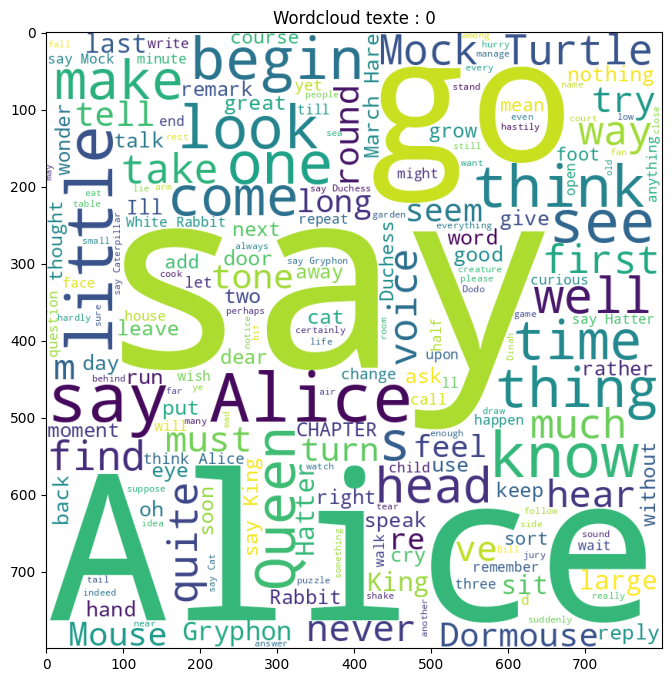

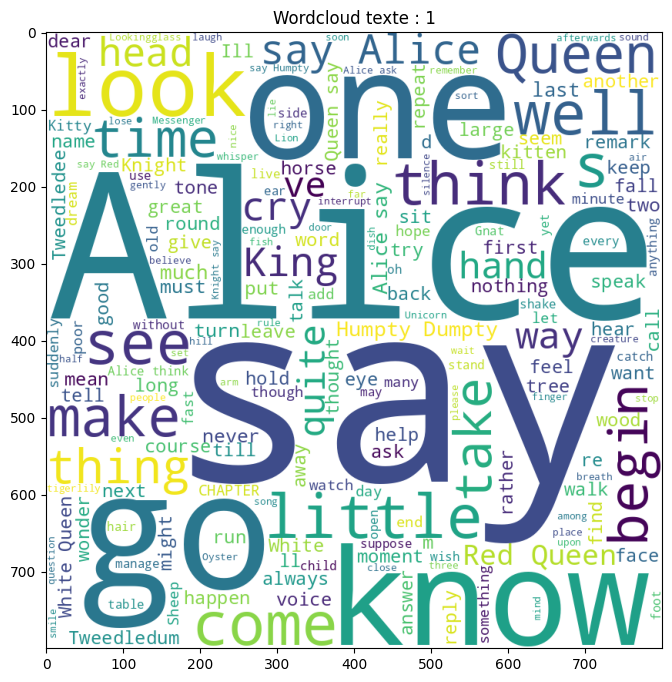

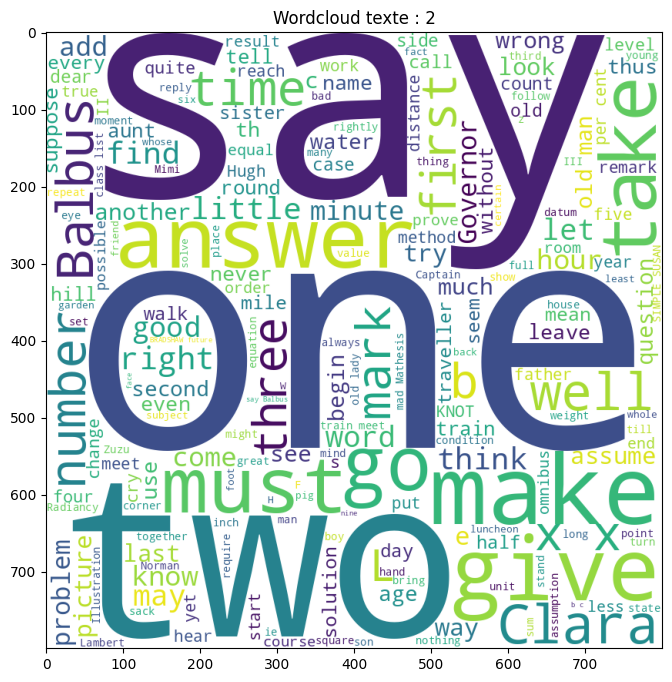

In [82]:
for i, tokens in enumerate(lem_books):
  text = " ".join(tokens)
  wc = WordCloud(background_color='white', width=800, height=800).generate(text)
  plt.figure(figsize=(8, 8))
  plt.imshow(wc)
  plt.title(f'Wordcloud texte : {i}')
  plt.show()

In [83]:
from collections import Counter

all_tokens = list()

for tokens in lem_books:
  all_tokens.extend(tokens)

word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(5)

for word, count in most_common_words:
  print(f"{word} : {count}")

say : 1294
Alice : 824
not : 606
one : 452
go : 417


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [" ".join(tokens) for tokens in filtered_books]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
vocab = vectorizer.get_feature_names_out()

for doc_idx, doc_vector in enumerate(X.toarray()):
    print(f"\n Document {doc_idx + 1} – BoW :")
    for word_idx, count in enumerate(doc_vector):
        if count > 0:
            word = vocab[word_idx]
            print(f"'{word}' (index {word_idx}) apparaît {count} fois")


 Document 1 – BoW :
'abide' (index 3) apparaît 1 fois
'able' (index 4) apparaît 1 fois
'absence' (index 11) apparaît 1 fois
'absurd' (index 16) apparaît 2 fois
'acceptance' (index 24) apparaît 1 fois
'accident' (index 26) apparaît 2 fois
'accidentally' (index 28) apparaît 1 fois
'account' (index 34) apparaît 1 fois
'accounting' (index 35) apparaît 1 fois
'accounts' (index 36) apparaît 1 fois
'accusation' (index 38) apparaît 1 fois
'accustomed' (index 39) apparaît 1 fois
'ache' (index 40) apparaît 1 fois
'across' (index 46) apparaît 5 fois
'act' (index 47) apparaît 1 fois
'actually' (index 51) apparaît 1 fois
'ada' (index 54) apparaît 1 fois
'added' (index 56) apparaît 23 fois
'adding' (index 58) apparaît 1 fois
'addressed' (index 65) apparaît 2 fois
'addressing' (index 66) apparaît 1 fois
'adjourn' (index 70) apparaît 1 fois
'adoption' (index 81) apparaît 1 fois
'advance' (index 85) apparaît 3 fois
'advantage' (index 86) apparaît 3 fois
'adventures' (index 87) apparaît 7 fois
'adventu

Text(0.5, 1.0, 'Répartition des 5 mots les plus fréquents')

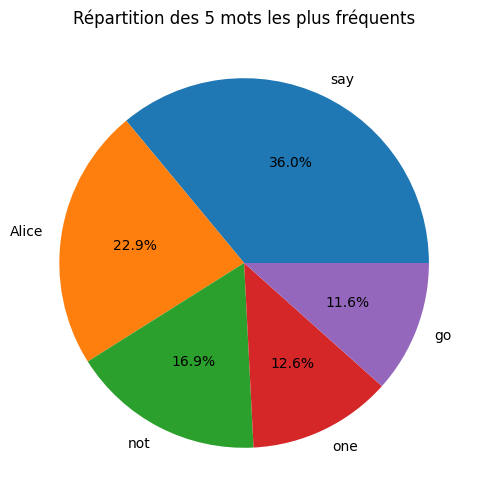

In [86]:
word = [word for word, freq in most_common_words]
frquencies = [freq for word, freq in most_common_words]

plt.figure(figsize=(10, 6))
plt.pie(frquencies, labels=word, autopct='%1.1f%%')
plt.title('Répartition des 5 mots les plus fréquents')

Les mots les plus fréquents comme "say", "go" ou "one" sont attendus dans un texte narratif, mais peu informatifs. Seul "Alice" est réellement pertinent.

# **Solving the frequency problem using TF-IDF**

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, max_df=2)
X_tfidf = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

for doc_idx, doc_vector in enumerate(X_tfidf.toarray()):
    print(f"\n Document {doc_idx + 1} – TF-IDF :")
    for word_idx, score in enumerate(doc_vector):
        if score > 0:
            word = feature_names[word_idx]
            print(f"  {word}: {score:.4f}")


 Document 1 – TF-IDF :
  abide: 0.0062
  able: 0.0047
  absence: 0.0062
  absurd: 0.0094
  acceptance: 0.0062
  accidentally: 0.0062
  account: 0.0047
  accounting: 0.0062
  accounts: 0.0047
  accusation: 0.0062
  accustomed: 0.0047
  ache: 0.0062
  ada: 0.0062
  adding: 0.0047
  addressing: 0.0047
  adjourn: 0.0062
  adoption: 0.0062
  advance: 0.0141
  adventuresbeginning: 0.0062
  advice: 0.0141
  advisable: 0.0123
  affair: 0.0062
  affectionately: 0.0047
  afford: 0.0062
  afore: 0.0062
  afraid: 0.0562
  aftertime: 0.0062
  againbefore: 0.0062
  agony: 0.0047
  ahem: 0.0062
  aim: 0.0047
  airs: 0.0062
  alarmed: 0.0047
  alas: 0.0187
  aliceand: 0.0062
  allow: 0.0141
  alongcatch: 0.0062
  altered: 0.0047
  alternately: 0.0062
  altogether: 0.0234
  ancient: 0.0047
  andoh: 0.0123
  anger: 0.0123
  animal: 0.0062
  animals: 0.0234
  ann: 0.0246
  annoy: 0.0047
  annoyed: 0.0047
  answers: 0.0047
  antipathies: 0.0062
  anywhere: 0.0047
  apiece: 0.0047
  appealed: 0.0047
  app

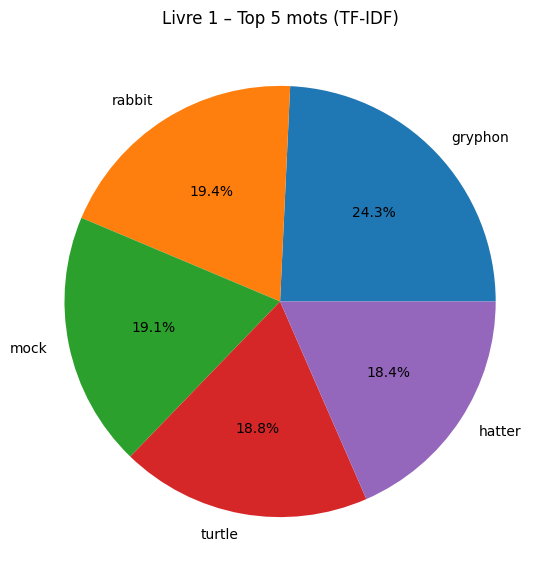

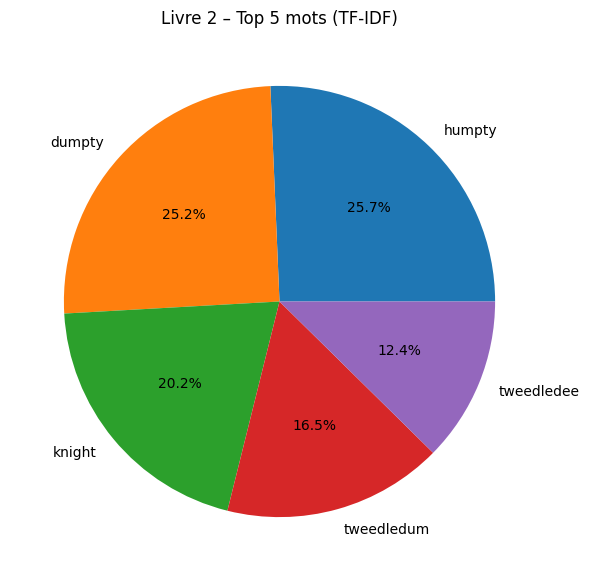

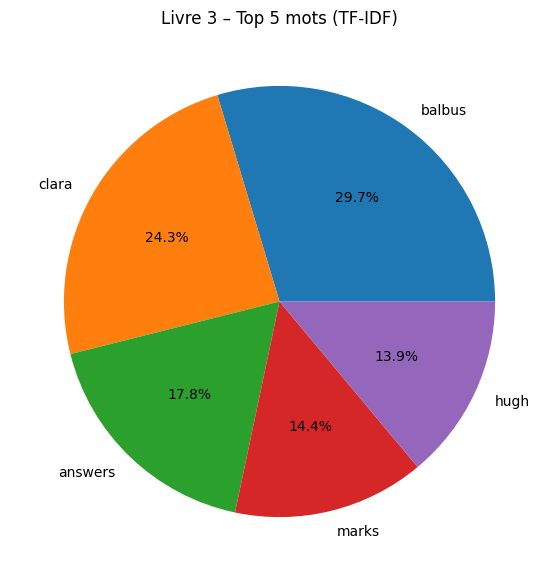

In [93]:
for doc_idx in range(X_tfidf.shape[0]):
    vector = X_tfidf[doc_idx].toarray().flatten()
    top_indices = np.argsort(vector)[-5:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [vector[i] for i in top_indices]

    plt.figure(figsize=(7, 7))
    plt.pie(top_scores, labels=top_words, autopct='%1.1f%%')
    plt.title(f"Livre {doc_idx + 1} – Top 5 mots (TF-IDF)")
    plt.show()